In [ ]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
df=pd.read_csv('/content/bankloan.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size

Counter({'N': 148, 'Y': 332})

In [ ]:
pre_y=df['Loan_Status']
pre_x=df.drop('Loan_Status', axis=1)
dm_x=pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1, N=0))
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [ ]:
smote= SMOTE(sampling_strategy=0.6)
x1,y=smote.fit_resample(dm_x, dm_y)
sc=MinMaxScaler()
x=sc.fit_transform(x1)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
classifier=Sequential()
classifier.add(Dense(200, activation='relu',kernel_initializer='random_normal',input_dim=x_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=20,epochs=100,verbose=0)
eval_model=classifier.evaluate(x_train, y_train)
eval_model

14/14 [==============================] - 1s 8ms/step - loss: 0.2348 - accuracy: 0.9057


[0.23478834331035614, 0.9056603908538818]

In [ ]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.58)

<bound method Axis.set_ticklabels of <matplotlib.axis.YAxis object at 0x7f1bd75f1b90>>

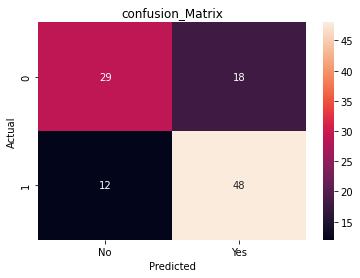

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('confusion_Matrix');
ax.xaxis.set_ticklabels(['No','Yes']); ax.yaxis.set_ticklabels

In [ ]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']

In [ ]:
from sklearn.model_selection import StratifiedKFold
kfold=StratifiedKFold(n_splits=3,shuffle=True, random_state=0)
cvscores=[]
for train, test in kfold.split(x,y):
  model= Sequential()
  model.add(Dense(200, input_dim=17, activation='relu'))
  model.add(Dense(400,activation='relu'))
  model.add(Dense(4,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

In [ ]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import Sequential
from keras.layers import Dense

 

In [ ]:
sc=MinMaxScaler()
mdl=joblib.load('/content/loan_model.pkl')
x=pd.read_excel('/content/test.xlsx')
x_test=sc.fit_transform(x)

In [ ]:
y_pred=mdl.predict(x_test)
y_pred=(y_pred)>0.58

In [ ]:
val=pd.DataFrame(y_pred, columns=['Status'])
val=val.replace({True: 'Approved', False: 'Rejected'})
val


,Status
0,Rejected
1,Approved
2,Approved
3,Rejected
4,Approved
5,Rejected
6,Approved
7,Rejected
8,Rejected
9,Rejected
